In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
df = pd.read_csv("Dataset .csv")
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [16]:
sns.set(style="whitegrid")

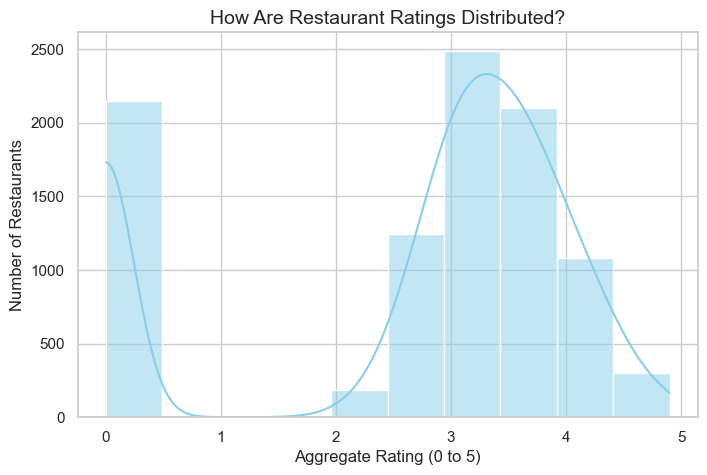

In [17]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Aggregate rating'], bins=10, kde=True, color='skyblue')
plt.title('How Are Restaurant Ratings Distributed?', fontsize=14)
plt.xlabel('Aggregate Rating (0 to 5)', fontsize=12)
plt.ylabel('Number of Restaurants', fontsize=12)
plt.grid(True)
plt.show()

In [18]:
print("How many restaurants fall into each rating category?")
print(df['Rating text'].value_counts())

How many restaurants fall into each rating category?
Rating text
Average      3737
Not rated    2148
Good         2100
Very Good    1079
Excellent     301
Poor          186
Name: count, dtype: int64


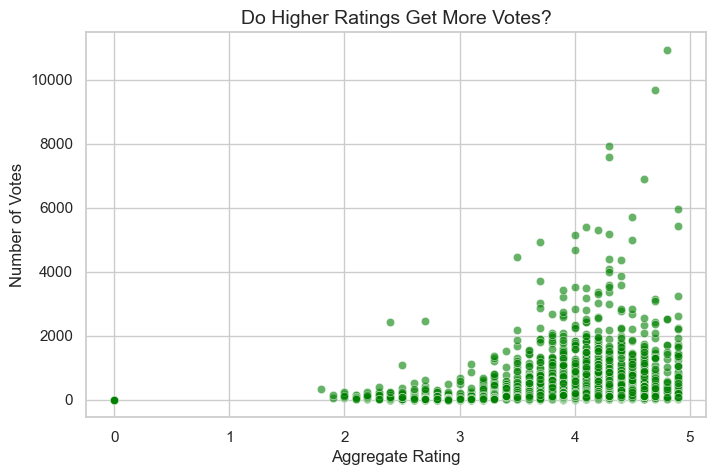

In [22]:
plt.figure(figsize=(8, 5))
sns.scatterplot(
    x='Aggregate rating', 
    y='Votes', 
    data=df, 
    alpha=0.6, 
    color='green'
)
plt.title('Do Higher Ratings Get More Votes?', fontsize=14)
plt.xlabel('Aggregate Rating', fontsize=12)
plt.ylabel('Number of Votes', fontsize=12)
plt.grid(True)
plt.show()

In [24]:
correlation = df['Aggregate rating'].corr(df['Votes'])
print(f"\nCorrelation between rating and number of votes: {correlation:.2f}")


Correlation between rating and number of votes: 0.31


In [25]:
average_rating_by_city = df.groupby('City')['Aggregate rating'].mean()

In [26]:
top_10_cities = average_rating_by_city.sort_values(ascending=False).head(10)

C:\Users\shrey\AppData\Local\Temp\ipykernel_7816\749459515.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_cities.values, y=top_10_cities.index, palette='viridis')


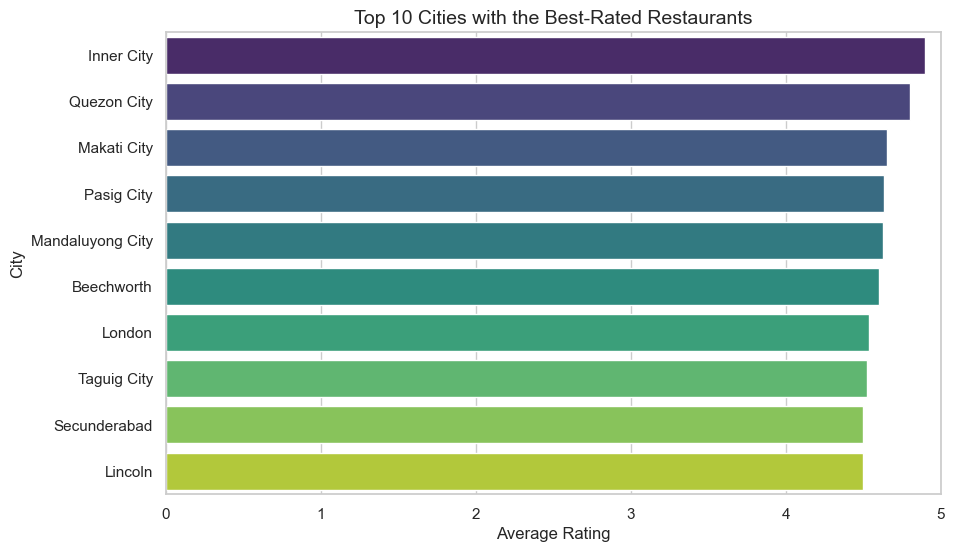

In [29]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_cities.values, y=top_10_cities.index, palette='viridis')
plt.title('Top 10 Cities with the Best-Rated Restaurants', fontsize=14)
plt.xlabel('Average Rating', fontsize=12)
plt.ylabel('City', fontsize=12)
plt.xlim(0, 5)
plt.show()